# Q1. Implement CNN model to image classification for the given fashion dataset. 

In [ ]:
Q1  Implement CNN model to image classification for the given fashion dataset. 

In [ ]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


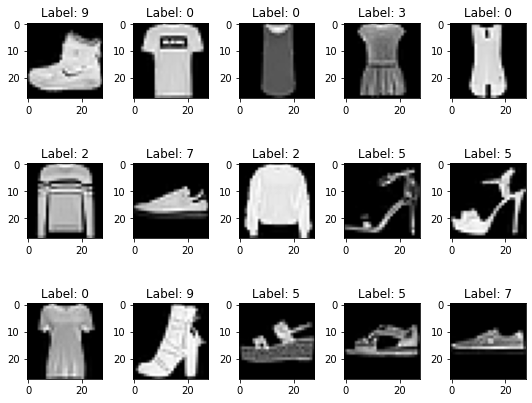

In [ ]:
%matplotlib inline
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = train_X[:num]
labels = train_Y[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
                                              metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 77s 82ms/step - loss: 0.6554 - accuracy: 0.7631
Epoch 2/10
938/938 [==============================] - 77s 82ms/step - loss: 0.3297 - accuracy: 0.8811
Epoch 3/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2753 - accuracy: 0.9000
Epoch 4/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2500 - accuracy: 0.9103
Epoch 5/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2310 - accuracy: 0.9146
Epoch 6/10
938/938 [==============================] - 76s 81ms/step - loss: 0.2123 - accuracy: 0.9219
Epoch 7/10
938/938 [==============================] - 76s 81ms/step - loss: 0.1926 - accuracy: 0.9284
Epoch 8/10
938/938 [==============================] - 76s 81ms/step - loss: 0.1852 - accuracy: 0.9324
Epoch 9/10
938/938 [==============================] - 76s 81ms/step - loss: 0.1703 - accuracy: 0.9385
Epoch 10/10
938/938 [==============================] - 76s 81ms/step - loss: 0.155

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.2926 - accuracy: 0.9027
Test loss 0.29262110590934753
Test accuracy 0.9027000069618225


9


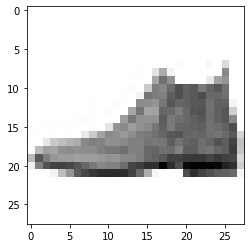

In [ ]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

# Q2 Implement hand written recognition using CNN model for mnist dataset.

In [ ]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


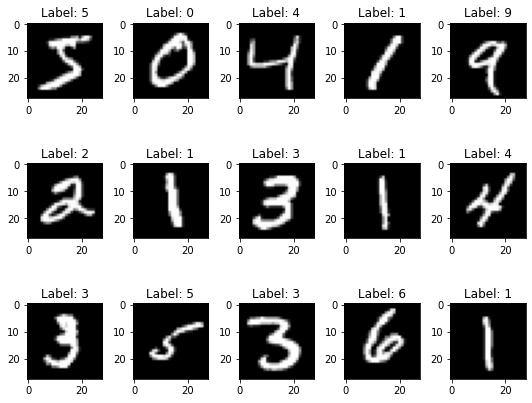

In [ ]:
%matplotlib inline
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = train_images[:num]
labels = train_labels[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
train_images=train_images.reshape(-1,28,28,1)
test_images=test_images.reshape(-1,28,28,1)
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.5341 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1146 - accuracy: 0.9638
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0901 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0786 - accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0718 - accuracy: 0.9775
Epoch 6/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0578 - accuracy: 0.9823
Epoch 8/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0565 - accuracy: 0.9829
Epoch 9/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0545 - accuracy: 0.9820
Epoch 10/10
1875/1875 [==============================] - 77s 41m

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test accuracy:',test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0341 - accuracy: 0.9892
test accuracy: 0.9891999959945679


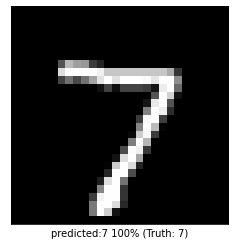

In [ ]:
def plot_image(i,predictions_array,true_y,x):
    predictions_array,true_y=predictions_array[i],true_y[i]
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(x.reshape(28,28),cmap='gray',interpolation='none')
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_y:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("predicted:{} {:2.0f}% (Truth: {})".format(predicted_label,100*np.max(predictions_array),true_y,color=color))
predictions=model.predict(test_images)
i=0
plot_image(i,predictions,test_labels,test_images[i])